In [1]:

import pygame
import random
import os
import time
import numpy as np
import math
import torch
import torch.nn.functional
import matplotlib.pyplot as plt
import torch.optim as opt
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.colors import LogNorm 
import matplotlib.cm as cm
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import copy

if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  

print(dev)


pygame 2.0.1 (SDL 2.0.14, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
cuda:0


D:\ComputerSoftwares\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
global target_order
target_order = "supervised"
global temp_list
temp_list = []
Agent_number_n=3;
Alpha = 0.666;



In [3]:
global temp_list
temp_list = []
def appen(_x_list,y):
    global temp_list
    temp_list.append(_x_list)
    
def appen_train(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    
    training_data.append(temp_list)
    training_label.append(S)
    

def read_training_data():
    for i in range(10000):
        appen_train(sorted(np.random.rand(Agent_number_n), reverse=True));

training_data=[]
training_label=[]
S=1.0
read_training_data();

def appen_test(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    testing_data.append(temp_list)
    testing_label.append(S)
    

def read_testing_data():
#     devided=20
#     for i1 in range(devided+1):
#         for i2 in range(i1+1):
#             for i3 in range(i2+1):
#                 appen_test(i1/devided,i2/devided,i3/devided);
    for i in range(1000):
        appen_test(sorted(np.random.rand(Agent_number_n), reverse=True));
                            

testing_data=[]
testing_label=[]
S=1.0
read_testing_data();

training_data=np.array(training_data)
training_label=np.array(training_label)
testing_data=np.array(testing_data)
testing_label=np.array(testing_label)
print(training_data)
print(testing_data)
print(training_label)
print(testing_label)

[[[0.40470528 0.17805086]
  [0.43467112 0.17805086]
  [0.43467112 0.40470528]]

 [[0.83144431 0.52379025]
  [0.99122554 0.52379025]
  [0.99122554 0.83144431]]

 [[0.20364624 0.19775287]
  [0.22941507 0.19775287]
  [0.22941507 0.20364624]]

 ...

 [[0.84181936 0.23280928]
  [0.95034636 0.23280928]
  [0.95034636 0.84181936]]

 [[0.4166448  0.18642958]
  [0.73820496 0.18642958]
  [0.73820496 0.4166448 ]]

 [[0.32265182 0.10887664]
  [0.96766203 0.10887664]
  [0.96766203 0.32265182]]]
[[[0.68918883 0.60257333]
  [0.69933922 0.60257333]
  [0.69933922 0.68918883]]

 [[0.73086505 0.27433541]
  [0.92951965 0.27433541]
  [0.92951965 0.73086505]]

 [[0.49789421 0.11390712]
  [0.98644887 0.11390712]
  [0.98644887 0.49789421]]

 ...

 [[0.50547981 0.4837436 ]
  [0.85777613 0.4837436 ]
  [0.85777613 0.50547981]]

 [[0.08993644 0.02772672]
  [0.26682991 0.02772672]
  [0.26682991 0.08993644]]

 [[0.23596156 0.09651635]
  [0.30358852 0.09651635]
  [0.30358852 0.23596156]]]
[1.01742727 2.34646011 1.   

In [4]:
def h_3_star(a, b, t):
    return a - min(a, t) + b - min(b, t) + max(min(a, t)+min(b, t), 2*t/3) + 1/2 * max(min(a, t)+min(b, t), t) - 1/2 * max(max(min(a, t), min(b, t)), 2*t/3) - t/6


def f_function(a, b, z):
    if(z >= 1):
        return (a+b)/2 + z/3
    else:
        return z/3 + h_3_star(a, b, 1-z)/2

def h_function(input_list):
    #input_list = sorted(input_list)
    g_list = []
    for j1 in range(len(input_list) ):
        for j2 in range(len(input_list)):
            if(j1 != j2):
                a = input_list[j1]
                b = input_list[j2]
                z = sum(input_list)- a-b

                g_list.append( f_function(a, b, z) * (Agent_number_n-1))
    h = sum(g_list) * 3 /  (Agent_number_n) /  (Agent_number_n-1) /  (Agent_number_n - 2)
    return h
                
                
x_list = []
y_list = []
z_list = []
result_list = []
training_supervised_label=[]
for index in range(len(training_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list.append(training_data[index][i][0])
        y_list.append(training_data[index][i][1])
        h = h_function(training_data[index][i])
        z_list.append(float(h))
        h_list.append(float(h))
    training_supervised_label.append(h_list)
    result_list.append(sum(h_list)/training_label[index]) 
    
    
print(max(result_list), min(result_list), max(result_list)-min(result_list))

2.333208314248635 2.0 0.33320831424863506


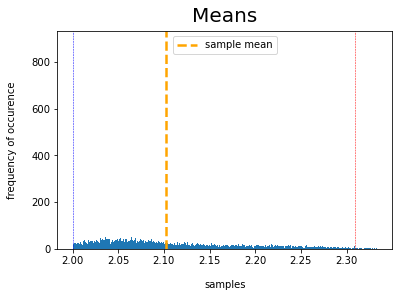

In [5]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

In [6]:
def h_function1(input_list,a,b):
    h = a[0]*max(sum(input_list),a[1]) + a[2]*max(sum(input_list),a[3]) + a[4]*max(input_list[0],a[5]) + b
    return h

In [7]:
len_a = 6


def Calculate(a):
    b = -100
    for index in range(len(training_data)):
        h_list = []
        for i in range(Agent_number_n):
            h = h_function1(training_data[index][i], a, b)
            h_list.append(float(h))
        if(sum(h_list) < (Agent_number_n-1)*training_label[index]):
            b += (training_label[index]*(Agent_number_n -
                                         1) - sum(h_list))/(Agent_number_n)

    result_list = []
    for index in range(len(training_data)):
        h_list = []
        for i in range(Agent_number_n):
            h = h_function1(training_data[index][i], a, b)
            h_list.append(float(h))
        result_list.append(sum(h_list)/training_label[index])
    return max(result_list)-min(result_list),a,b,[max(result_list),min(result_list)]


def Dichotomy(a,delta):

    for i in range(len_a):
        a_low = copy.deepcopy (a)
        a_high = copy.deepcopy (a)
        a_low[i]-=0.01
        a_high[i]+=0.01
        res_mid_low,a,b,others = Calculate(a_low)
        res_mid_high,a,b,others = Calculate(a_high)
        #print(res_mid_low,res_mid_high)

        delta[i] = (res_mid_high - res_mid_low)*0.001 
        a[i]+=delta[i]
    print(Calculate(a),delta)
    print()
    delta_sum = 0
    for i in range(len_a):
        delta_sum += abs(delta[i])
        
    if(delta_sum <= 1e-8):
        return a
    Dichotomy(a,delta)

In [8]:

a = np.random.rand(len_a)



print(Dichotomy(a,np.ones(len_a)*0.01))

(2.2519556698273018, array([0.31410353, 0.27661779, 0.14174885, 0.89619146, 0.11917497,
       0.53424281]), 0.9564929755972025, [4.251955669827302, 2.0]) [-7.46195158e-05  6.28207050e-06 -6.22279734e-05  2.83497702e-06
 -1.16775118e-05  2.38349944e-06]

(2.1845208443260775, array([0.32402911, 0.28662427, 0.15168682, 0.90619449, 0.12916349,
       0.54424539]), 0.9072742403382106, [4.1845208443260775, 2.0]) [-7.44193901e-05  6.48058212e-06 -6.20279167e-05  3.03373646e-06
 -1.14774641e-05  2.58326989e-06]

(2.1176819591623115, array([0.33395489, 0.29663095, 0.161625  , 0.91619773, 0.13915222,
       0.55424818]), 0.8580545146548841, [4.1176819591623115, 2.0]) [-7.42192605e-05  6.67909773e-06 -6.18278560e-05  3.23249991e-06
 -1.12774125e-05  2.78304434e-06]

(2.0514390501482858, array([0.34388087, 0.30663783, 0.17156337, 0.92620116, 0.14914114,
       0.56425116]), 0.8088337985275359, [4.051439050148286, 2.0]) [-7.40191269e-05  6.87761735e-06 -6.16277914e-05  3.43126735e-06
 -1.10773568e

(1.0138112326299056, array([0.63223803, 0.5969237 , 0.46042882, 1.21671055, 0.439067  ,
       0.85417836]), -0.4891871084012429, [3.013811232629906, 2.0000000000000004]) [-2.35458683e-05  1.26447606e-05 -1.50586129e-06  2.38691769e-05
  3.91942933e-06 -1.75626798e-05]

(1.0123103885589302, array([0.64221468, 0.60693654, 0.47042792, 1.22673601, 0.44907052,
       0.8641604 ]), -0.5277462494028585, [3.01231038855893, 2.0]) [-2.33456154e-05  1.28442937e-05 -9.04429135e-07  2.54599658e-05
  3.52013184e-06 -1.79628206e-05]

(1.0083602060156776, array([0.65219154, 0.61694959, 0.4804275 , 1.23675644, 0.45907364,
       0.87414204]), -0.5674534637384491, [3.0083602060156776, 2.0]) [-2.31453585e-05  1.30438308e-05 -4.20993437e-07  2.04359365e-05
  3.12085035e-06 -1.83629455e-05]

(1.0042808868028636, array([0.66216736, 0.62696283, 0.49042655, 1.24677423, 0.46907636,
       0.88412327]), -0.607534068414459, [3.0042808868028636, 2.0]) [-2.41795108e-05  1.32433472e-05 -9.45005481e-07  1.77902683e

(0.927847293805856, array([0.9513503 , 0.91743366, 0.78042106, 1.53707599, 0.7590843 ,
       1.17399758]), -2.01858366653995, [2.927847293805856, 2.0]) [-3.15794952e-05  1.90270061e-05 -4.44089210e-19  2.93355281e-06
  0.00000000e+00  1.33226763e-18]

(0.9215416881913479, array([0.96131833, 0.92745288, 0.79042106, 1.54707714, 0.7690843 ,
       1.18399758]), -2.076072628863751, [2.921541688191348, 2.0]) [-3.19767946e-05  1.92263665e-05  1.33226763e-18  1.15596298e-06
 -4.44089210e-19  4.44089210e-19]

(0.9183046255364697, array([0.97128655, 0.93747231, 0.80042106, 1.55708001, 0.7790843 ,
       1.19399758]), -2.1330069734141275, [2.9183046255364697, 2.0]) [-3.17764101e-05  1.94257310e-05  0.00000000e+00  2.86662742e-06
  0.00000000e+00  0.00000000e+00]

(0.9207917836386756, array([0.98125185, 0.94750022, 0.81042102, 1.56708294, 0.7890843 ,
       1.20399758]), -2.1912728734416382, [2.920791783638676, 2.0000000000000004]) [-3.47019813e-05  2.79167366e-05 -4.04520232e-08  2.93029846e-06

(1.6747594598897768, array([1.26113085, 1.22909609, 1.09042102, 1.84708431, 1.0690843 ,
       1.48399758]), -3.925749263372597, [3.674759459889777, 2.0]) [-7.65216185e-07  6.53273967e-05  1.99840144e-18  0.00000000e+00
  0.00000000e+00  0.00000000e+00]

(1.7031028379003699, array([1.27113052, 1.23915208, 1.10042102, 1.85708431, 1.0790843 ,
       1.49399758]), -3.996480381738812, [3.70310283790037, 2.0]) [-3.26590107e-07  5.59927504e-05 -1.55431223e-18  0.00000000e+00
  0.00000000e+00 -8.88178420e-19]

(1.7271904422095763, array([1.28112968, 1.24920463, 1.11042102, 1.86708431, 1.0890843 ,
       1.50399758]), -4.069226137049228, [3.7271904422095767, 2.0000000000000004]) [-8.49179878e-07  5.25467661e-05  6.66133815e-19  0.00000000e+00
  0.00000000e+00  0.00000000e+00]

(1.7591068997003458, array([1.29112921, 1.25926113, 1.12042102, 1.87708431, 1.0990843 ,
       1.51399758]), -4.13996889276789, [3.7591068997003454, 1.9999999999999996]) [-4.66515130e-07  5.64986553e-05 -2.66453526e-18  

(2.5989277264085273, array([1.58109522, 1.55097995, 1.41042102, 2.16708431, 1.3890843 ,
       1.80399758]), -6.4816770629909355, [4.598927726408527, 1.9999999999999996]) [-8.74742022e-07  4.63064192e-05 -2.22044605e-18  0.00000000e+00
  0.00000000e+00  0.00000000e+00]

(2.636409144343961, array([1.59109454, 1.56103351, 1.42042102, 2.17708431, 1.3990843 ,
       1.81399758]), -6.568594046184653, [4.63640914434396, 1.9999999999999996]) [-6.73815894e-07  5.35588144e-05 -2.22044605e-18  8.88178420e-19
  0.00000000e+00  8.88178420e-19]

(2.675119373358982, array([1.6010931 , 1.57110992, 1.43042102, 2.18708431, 1.4090843 ,
       1.82399758]), -6.655737869818046, [4.675119373358982, 2.0000000000000004]) [-1.44051186e-06  7.64126079e-05 -4.44089210e-18  9.76996262e-18
  0.00000000e+00 -8.88178420e-19]

(2.723239929630529, array([1.61109183, 1.58119752, 1.44042102, 2.19708431, 1.4190843 ,
       1.83399758]), -6.74036471068385, [4.723239929630529, 2.0000000000000004]) [-1.27136326e-06  8.7601

(3.549567203612205, array([1.89107381, 1.86286979, 1.72042102, 2.47708431, 1.6990843 ,
       2.11399758]), -9.526456570104497, [5.549567203612204, 1.9999999999999991]) [-1.00954678e-06  7.80694100e-05 -3.55271368e-18  3.55271368e-18
  0.00000000e+00 -3.55271368e-18]

(3.5798412235928345, array([1.90107318, 1.87293604, 1.73042102, 2.48708431, 1.7090843 ,
       2.12399758]), -9.634435315226032, [5.579841223592835, 2.0000000000000004]) [-6.27001441e-07  6.62526861e-05  4.44089210e-19  0.00000000e+00
  0.00000000e+00  0.00000000e+00]

(3.6014698574019697, array([1.91107247, 1.88298835, 1.74042102, 2.49708431, 1.7190843 ,
       2.13399758]), -9.745870351669556, [5.60146985740197, 1.9999999999999998]) [-7.10763164e-07  5.23030447e-05  0.00000000e+00  0.00000000e+00
  8.88178420e-19  0.00000000e+00]

(3.62051921505909, array([1.92107199, 1.89302946, 1.75042102, 2.50708431, 1.7290843 ,
       2.14399758]), -9.858745109151315, [5.62051921505909, 2.0000000000000004]) [-4.80693500e-07  4.11087